# L1 regularization 

### Iris Dataset  - Feature : 4

In [3]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


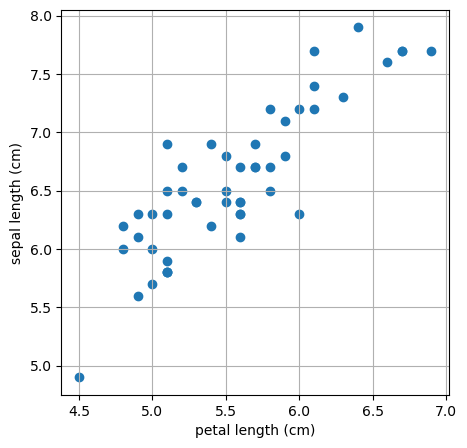

In [4]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


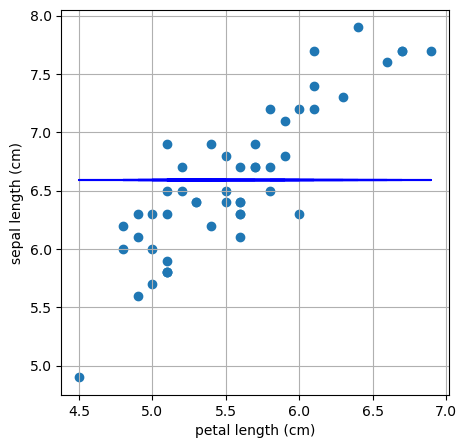

In [5]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.99, 절편 : 1.08


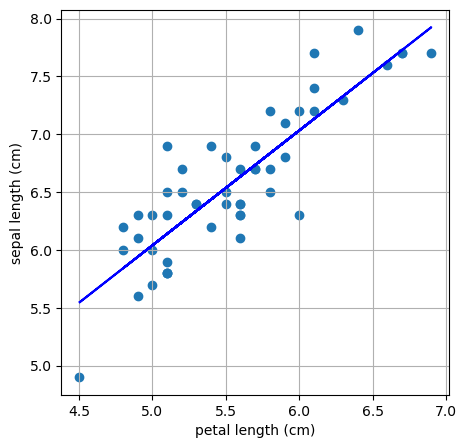

In [10]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.001)
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## 컬럼 수가 많은 데이터에서의 L1 regularization 비교

### Wine DataSet - Feature : 13

In [67]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

wine_df.head(5)

### Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(wine_df,target_df, test_size=0.3, random_state=36)

print(X_train.shape , y_train.shape)

print(X_test.shape , y_test.shape)

model = LinearRegression()

model.fit(X_train,y_train)

pred = model.predict(X_test)

print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

(124, 13) (124, 1)
(54, 13) (54, 1)
result of linear regression
Mean Absolute Error: 0.2159173265719318
Mean Squared Error: 0.06795982298780391
Mean Root Squared Error: 0.260691048921523


 coefficient linear regression
[[-0.12967198  0.03584226 -0.06303957  0.0354151  -0.00048785  0.13728904
  -0.37020976 -0.24948259  0.0556847   0.08413864 -0.07160778 -0.25458942
  -0.00074916]]


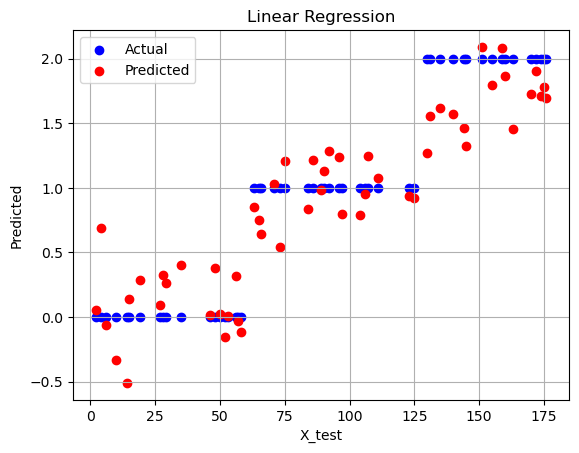

In [56]:

# 데이터셋 스캐터 플롯
plt.scatter(X_test.index, y_test, color='blue', label='Actual')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Scatter Plot')
plt.legend()

# 모델의 예측 결과 플롯
plt.scatter(X_test.index, pred, color='red', label='Predicted')
plt.xlabel('X_test')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.show()

### L1 Regularization

In [75]:

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)


(124, 13) (124, 1)
(54, 13) (54, 1)


In [94]:
from sklearn.linear_model import Lasso

#L1 = Lasso(alpha=0.05)
L1 = Lasso(alpha=0.05,max_iter=5)

L1.fit(X_train,y_train)

pred = L1.predict(X_test)

print("result of L1 regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient L1 regression")
print(L1.coef_)

result of L1 regression
Mean Absolute Error: 0.2484576884176944
Mean Squared Error: 0.1026298911034127
Mean Root Squared Error: 0.32035900346862844


 coefficient L1 regression
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [95]:
from sklearn.linear_model import Lasso

#L1 = Lasso(alpha=0.05)
L1 = Lasso(max_iter=5)

L1.fit(X_train,y_train)

pred_0 = L1.predict(X_test)

print("result of L1 regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_0))
print('Mean Squared Error:', mean_squared_error(y_test, pred_0))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred_0)))

print("\n\n coefficient L1 regression")
print(L1.coef_)

result of L1 regression
Mean Absolute Error: 0.46779631557328155
Mean Squared Error: 0.31452622171724987
Mean Root Squared Error: 0.5608263739494157


 coefficient L1 regression
[ 0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.00149633]


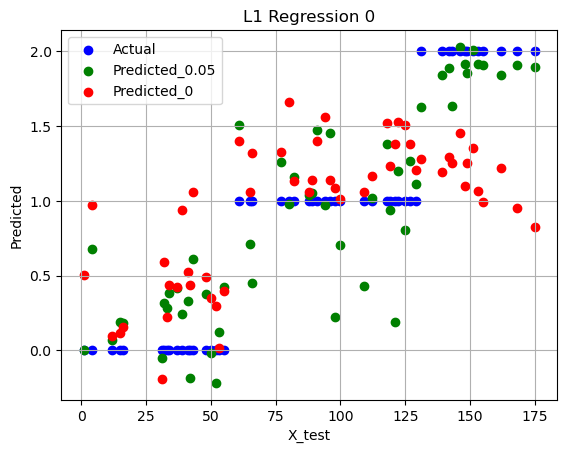

In [96]:

# 데이터셋 스캐터 플롯
plt.scatter(X_test.index, y_test, color='blue', label='Actual')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Scatter Plot')
plt.legend()

# 모델의 예측 결과 플롯
plt.scatter(X_test.index, pred, color='green', label='Predicted_0.05')
plt.xlabel('X_test')
plt.ylabel('Predicted')
plt.title('L1 Regression 0.05')
plt.legend()


# 모델의 예측 결과 플롯
plt.scatter(X_test.index, pred_0, color='red', label='Predicted_0')
plt.xlabel('X_test')
plt.ylabel('Predicted')
plt.title('L1 Regression 0')
plt.legend()


plt.grid()
plt.show()